In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("unlabeled.csv") 
#Reading csv as Pandas Dataframe

In [ ]:
df = df[df["confidence"] > 0.870] 
#Removing Values with confidence lower than 0.870

In [ ]:
df = df.drop(["Unnamed: 0"], axis = 1)
processingFrame = df.drop(['filename', 'confidence'], axis = 1)
scaler = StandardScaler()

AUFrame = processingFrame.filter(regex = '_r$') 
# keeping only AU_r values

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(AUFrame),columns = AUFrame.columns, index = AUFrame.index) 
#Performing Standard Scalar on selected subset 

In [ ]:
from sklearn.decomposition import PCA

pca_AU = PCA (n_components = 2) # PCA model for 2 components
pc_AU = pca_AU.fit_transform(df_scaled) #Fitting the scaled data through the pca

In [ ]:
dfPCA = pd.DataFrame(data = pc_AU, columns = ["PC1", "PC2"]) #Creating a DataFrame after PCA Dimension Squeeze

In [ ]:
print('Variation per principal component: {}'.format(pca_AU.explained_variance_ratio_)) 
#This % represents amount of information a component holds compared to the original Data. (60% data lost)

Variation per principal component: [0.32947089 0.09408079]


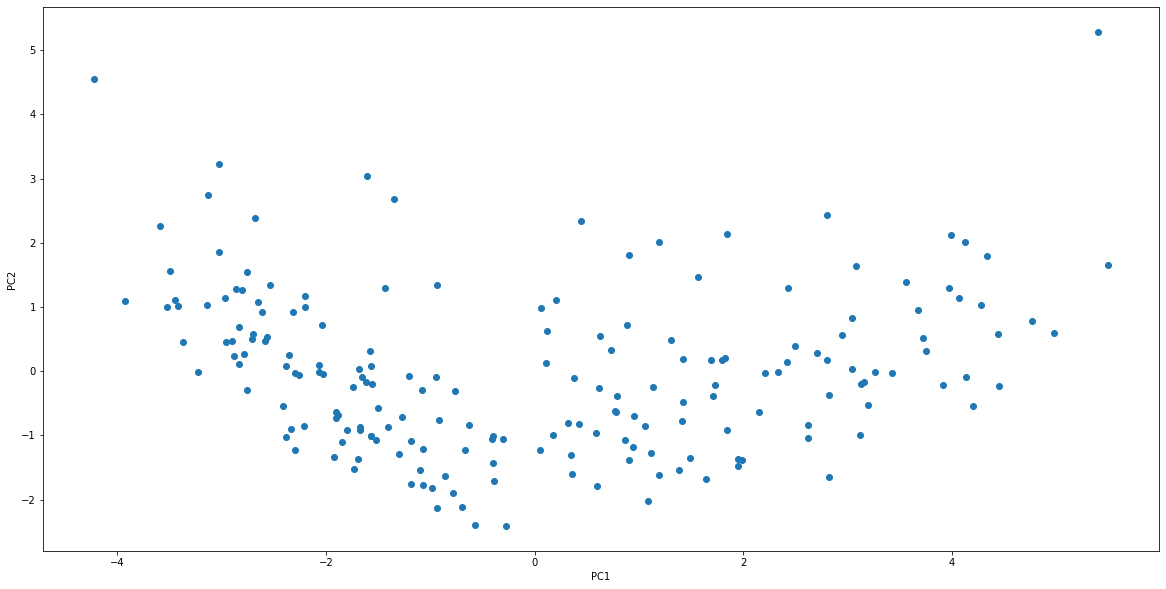

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.scatter(dfPCA["PC1"], dfPCA["PC2"]) 
 #Plotting the Datapoints


In [ ]:
!pip install yellowbrick 
#This is required for Silhoutte Visualizer in next cell

import warnings
warnings.filterwarnings("ignore")

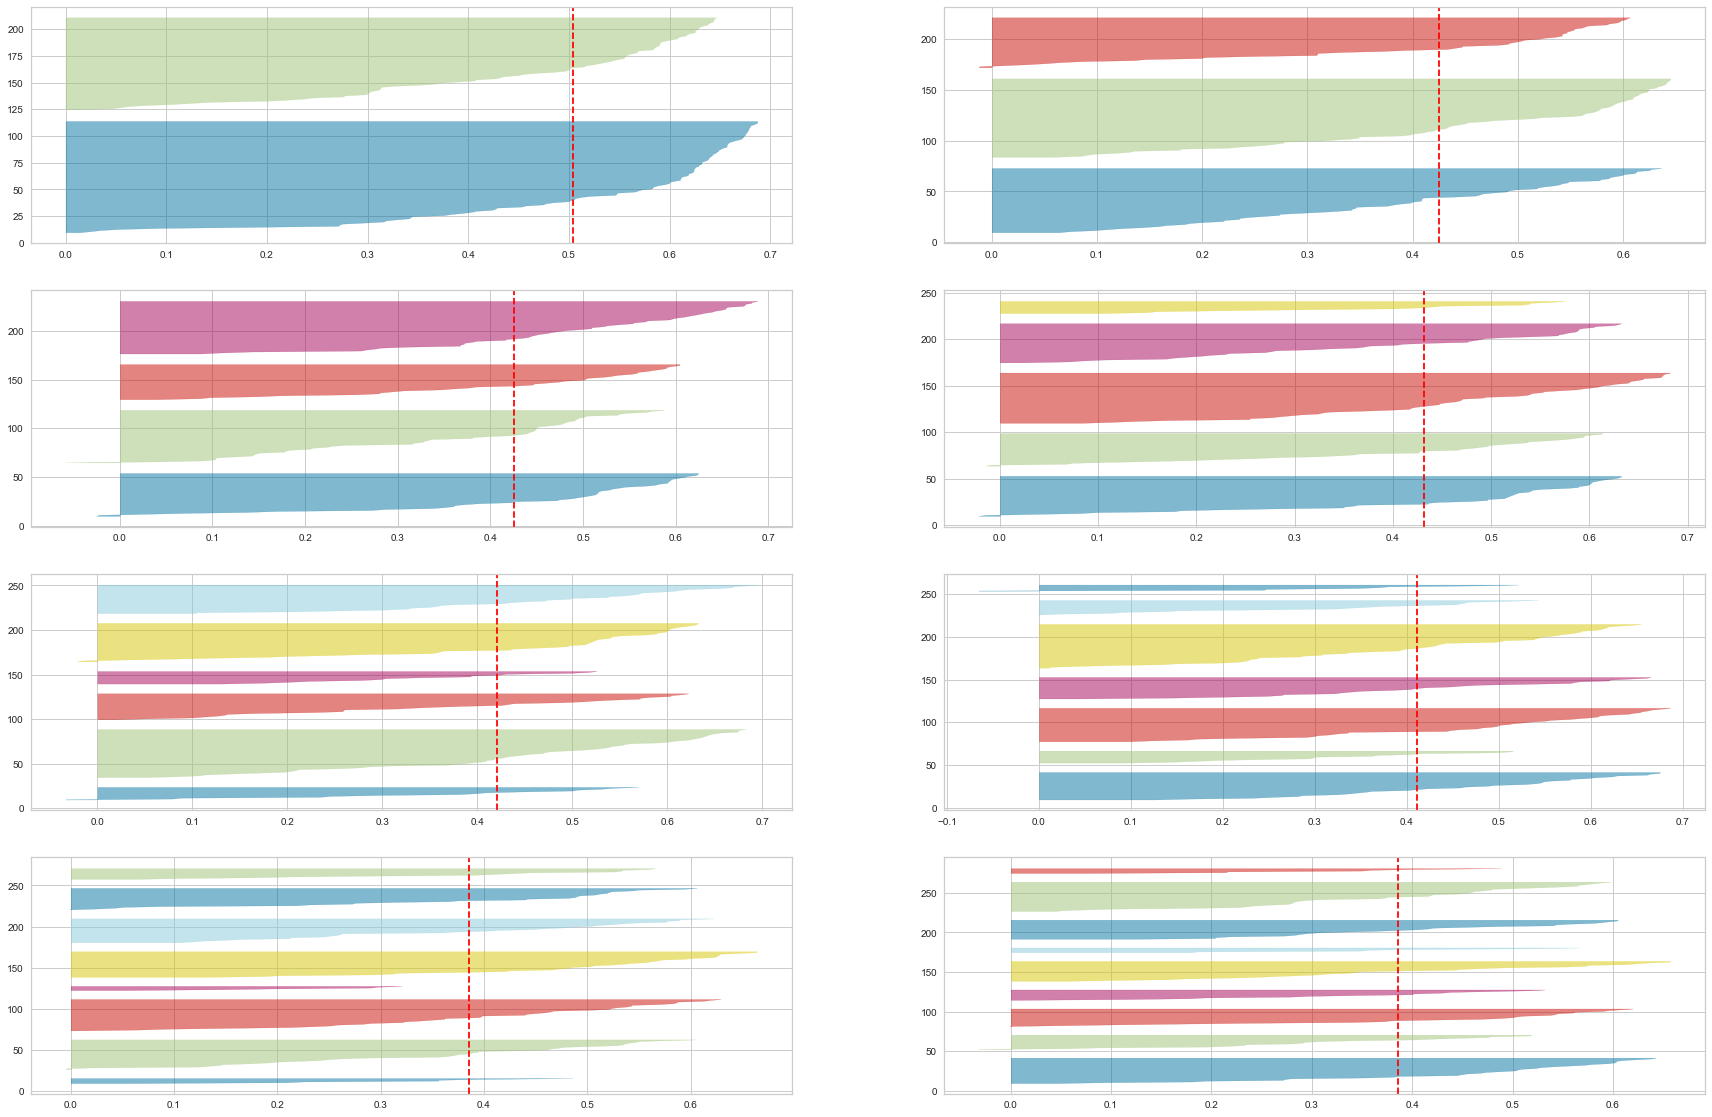

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

_ , ax1 = plt.subplots(4,2,figsize=(30,20))

for i in [2,3,4,5,6,7,8,9]:
  k = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  label = k.fit_predict(dfPCA)
  axel, mod = divmod (i,2)
  visualizer = SilhouetteVisualizer(k, colors = 'yellowbrick', ax=ax1[axel-1][mod])
  visualizer.fit(dfPCA)
  
  if i == 2:  
    labels = label
    centers = k.cluster_centers_


#Inspiration for SilhoutteVisualizer
#https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/  


In [ ]:
labels

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The optimal Score for Silhoutte in KMeans clustering was best for the case where there are **2 clusters** encompassing all data points. The corresponding silhoutte score was **0.52**

**Optimal Value : 2**

This signifies that in multiple cluster divisions of different sizes, dividing the dataset in only 2 parts achieves the best homogeneity amongst the clusters i.e. these clusters have points that are very similar to each other compared to the other cluster.


In [ ]:
def colorMap(i):
  if i == 1:
    return "turquoise" # happy / right
  else:
    return "limegreen" # shocked / left


In [ ]:
maper = np.vectorize(colorMap)
colorscheme = maper(labels)

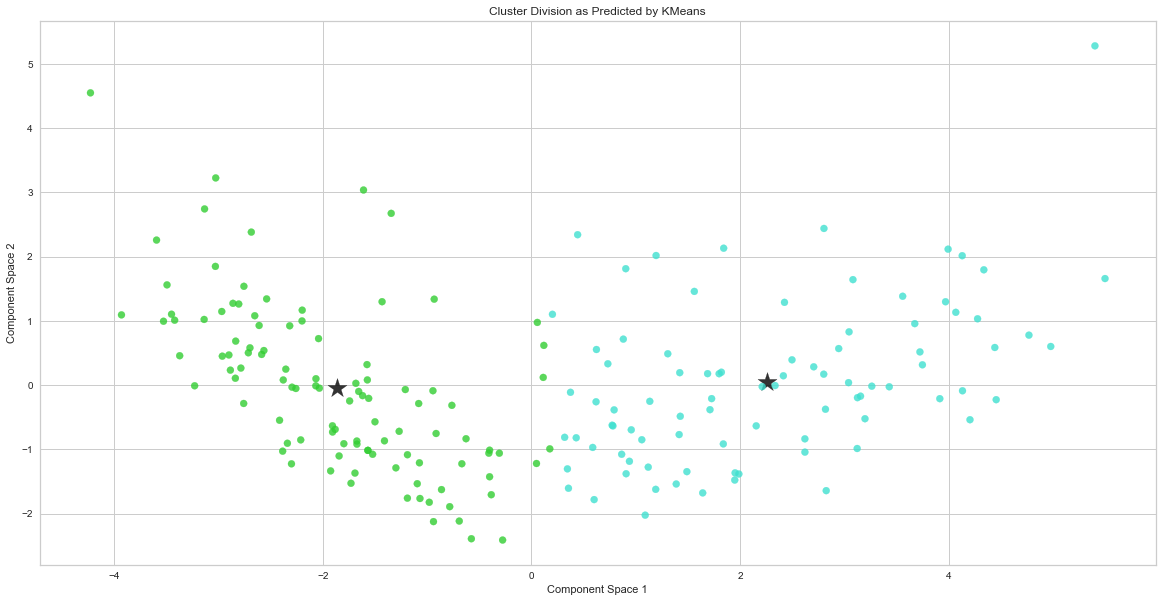

In [ ]:
#PART 3

plt.figure(figsize=(20,10))
plt.xlabel("Component Space 1")
plt.ylabel("Component Space 2")
plt.title ("Cluster Division as Predicted by KMeans")

plt.scatter (centers[:, 0], 
             centers[:, 1],
             marker = "*",                  #Plotting the centroid (mean) of the clusters
             c = "black",
             alpha = 0.8,
             s = 400,
             edgecolor = 'k',
)


plt.scatter(dfPCA["PC1"], dfPCA["PC2"], c = colorscheme, alpha = 0.8) 


In [ ]:
dfPCA["filename"] = df["filename"] 
#Concatenate original filenames on index of dataset

In [ ]:
dfPCA["labels"] = labels 
# Add labels column to dataset

In [ ]:
sortDFonlabel = dfPCA.sort_values(by = "labels") 
#Sort Images on Label values

In [ ]:
filenames = sortDFonlabel["filename"] 

In [ ]:
filenameJPG = filenames.str.replace(".csv", ".jpg") 

In [ ]:
filenameJPG = filenameJPG.dropna() 
#Dropping Nan

Training_2928428.jpg


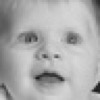

Training_2461384.jpg


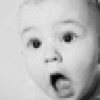

Training_3170103.jpg


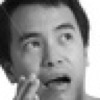

Training_3619083.jpg


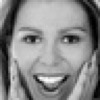

Training_3580545.jpg


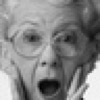

Training_2829796.jpg


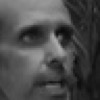

Training_2387600.jpg


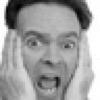

Training_3240036.jpg


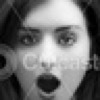

Training_1226915.jpg


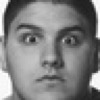

Training_3059363.jpg


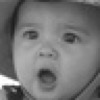

Training_2995783.jpg


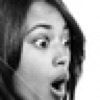

Training_734790.jpg


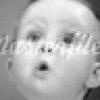

Training_1431119.jpg


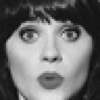

Training_2347355.jpg


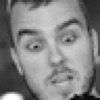

Training_353184.jpg


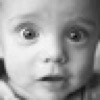

Training_1730563.jpg


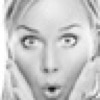

Training_3323309.jpg


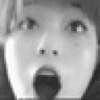

Training_1474328.jpg


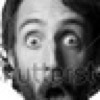

Training_2704078.jpg


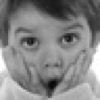

Training_1002457.jpg


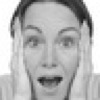

Training_2929493.jpg


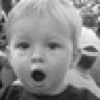

Training_1820471.jpg


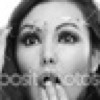

Training_2278492.jpg


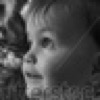

Training_371241.jpg


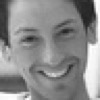

Training_666810.jpg


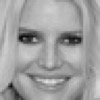

Training_1943322.jpg


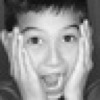

Training_529327.jpg


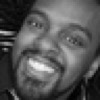

Training_1338751.jpg


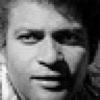

Training_2286545.jpg


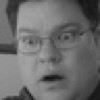

Training_1525314.jpg


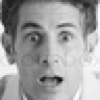

Training_870398.jpg


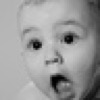

Training_737165.jpg


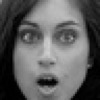

Training_170069.jpg


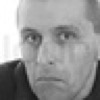

Training_3040977.jpg


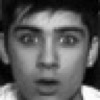

Training_238687.jpg


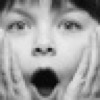

Training_1774788.jpg


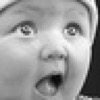

Training_1081053.jpg


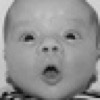

Training_3408758.jpg


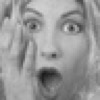

Training_598323.jpg


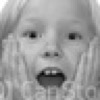

Training_3221111.jpg


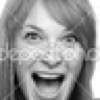

Training_1817980.jpg


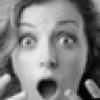

Training_815036.jpg


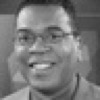

Training_164916.jpg


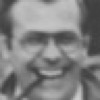

Training_87867.jpg


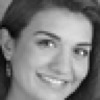

Training_3267573.jpg


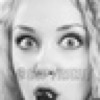

Training_1047709.jpg


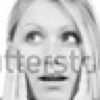

Training_1603608.jpg


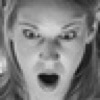

Training_735050.jpg


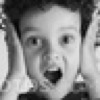

Training_3717810.jpg


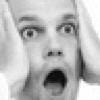

Training_3841930.jpg


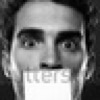

Training_694448.jpg


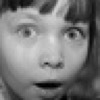

Training_3433153.jpg


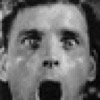

Training_1195432.jpg


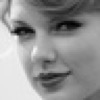

Training_2053636.jpg


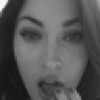

Training_3633758.jpg


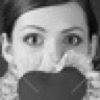

Training_1548283.jpg


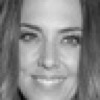

Training_1009179.jpg


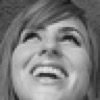

Training_2089965.jpg


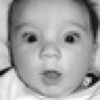

Training_3075383.jpg


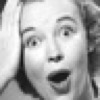

Training_143503.jpg


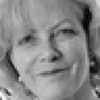

Training_247146.jpg


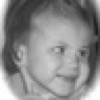

Training_512121.jpg


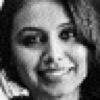

Training_1062767.jpg


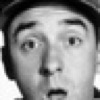

Training_1389208.jpg


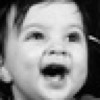

Training_2989544.jpg


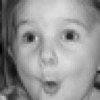

Training_3159863.jpg


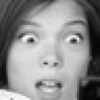

Training_8796.jpg


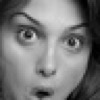

Training_1600279.jpg


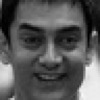

Training_3653265.jpg


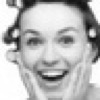

Training_2463049.jpg


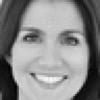

Training_220550.jpg


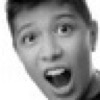

Training_3419855.jpg


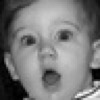

Training_1383157.jpg


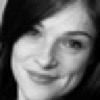

Training_2898900.jpg


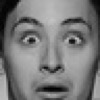

Training_438558.jpg


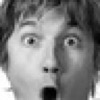

Training_1269926.jpg


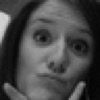

Training_1428120.jpg


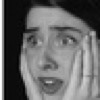

Training_3476836.jpg


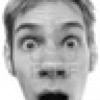

Training_1359028.jpg


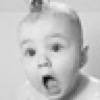

Training_3737288.jpg


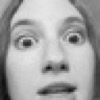

Training_795400.jpg


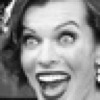

Training_2244480.jpg


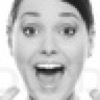

Training_1742253.jpg


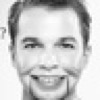

Training_1657764.jpg


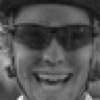

Training_3060950.jpg


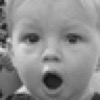

Training_2001220.jpg


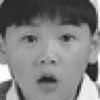

Training_3297674.jpg


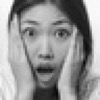

Training_1676849.jpg


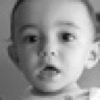

Training_2594780.jpg


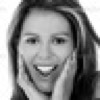

Training_2167273.jpg


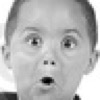

Training_2968008.jpg


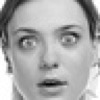

Training_623077.jpg


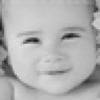

Training_2659089.jpg


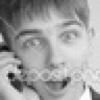

Training_1304413.jpg


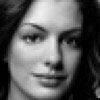

Training_791744.jpg


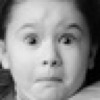

Training_377657.jpg


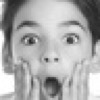

Training_44083.jpg


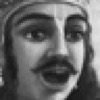

Training_860918.jpg


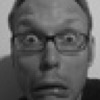

Training_1018317.jpg


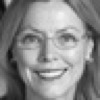

Training_1075765.jpg


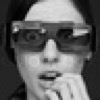

Training_2393566.jpg


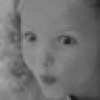

Training_1082705.jpg


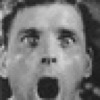

Training_730547.jpg


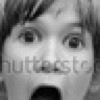

Training_3110305.jpg


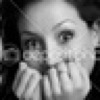

Training_359386.jpg


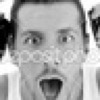

Training_336818.jpg


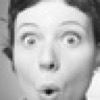

Training_2647455.jpg


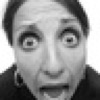

Training_343893.jpg


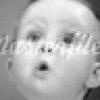

Training_2644279.jpg


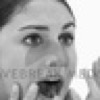

Training_1921095.jpg


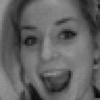

Training_1214649.jpg


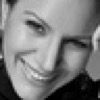

Training_842233.jpg


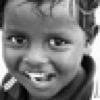

Training_434102.jpg


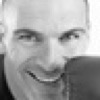

Training_1866804.jpg


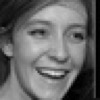

Training_1564486.jpg


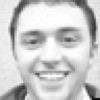

Training_127944.jpg


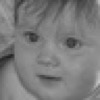

Training_832034.jpg


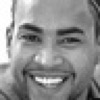

Training_1834898.jpg


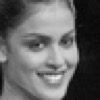

Training_625682.jpg


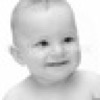

Training_1318112.jpg


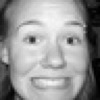

Training_681715.jpg


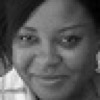

Training_1154381.jpg


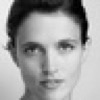

Training_1278231.jpg


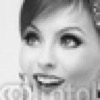

Training_123362.jpg


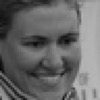

Training_1722084.jpg


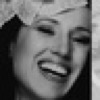

Training_295282.jpg


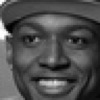

Training_748777.jpg


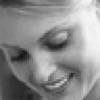

Training_539738.jpg


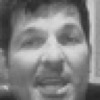

Training_1193951.jpg


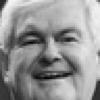

Training_961713.jpg


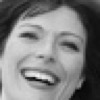

Training_1633314.jpg


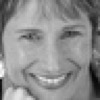

Training_582538.jpg


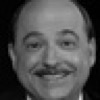

Training_1433924.jpg


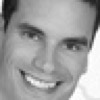

Training_1151951.jpg


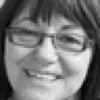

Training_526145.jpg


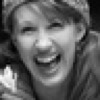

Training_109676.jpg


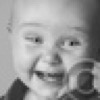

Training_1726444.jpg


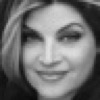

Training_1603171.jpg


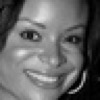

Training_505141.jpg


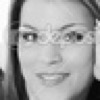

Training_679787.jpg


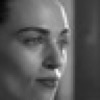

Training_879015.jpg


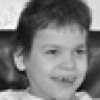

Training_1409503.jpg


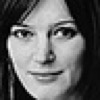

Training_50580.jpg


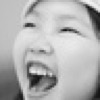

Training_1359924.jpg


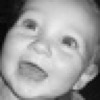

Training_1730353.jpg


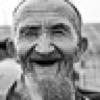

Training_830377.jpg


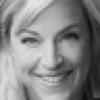

Training_185749.jpg


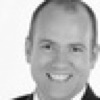

Training_839482.jpg


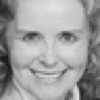

Training_1206.jpg


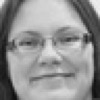

Training_926400.jpg


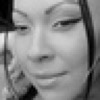

Training_335906.jpg


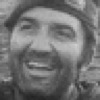

Training_1122712.jpg


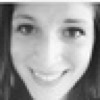

Training_1577302.jpg


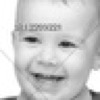

Training_1314754.jpg


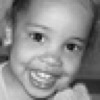

Training_158782.jpg


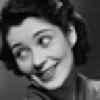

Training_970115.jpg


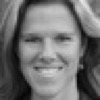

Training_309009.jpg


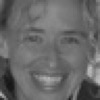

Training_1529248.jpg


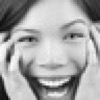

Training_1196542.jpg


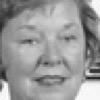

Training_354659.jpg


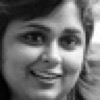

Training_536466.jpg


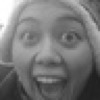

Training_1041361.jpg


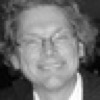

Training_1505570.jpg


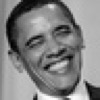

Training_808814.jpg


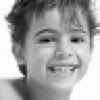

Training_355217.jpg


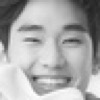

Training_1221706.jpg


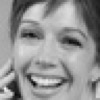

Training_1736801.jpg


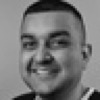

Training_1161132.jpg


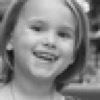

Training_799909.jpg


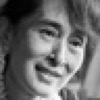

Training_1596849.jpg


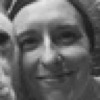

Training_1689717.jpg


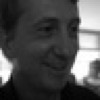

Training_351152.jpg


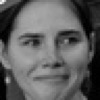

Training_1027250.jpg


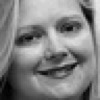

Training_11204.jpg


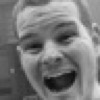

Training_196501.jpg


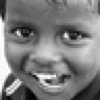

Training_1674498.jpg


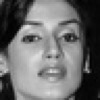

Training_535814.jpg


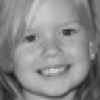

Training_195994.jpg


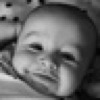

Training_430147.jpg


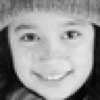

Training_1870895.jpg


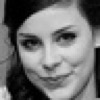

Training_1658507.jpg


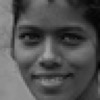

Training_831592.jpg


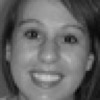

Training_498981.jpg


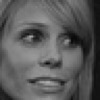

Training_283630.jpg


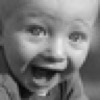

Training_932739.jpg


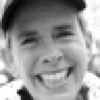

In [ ]:
from PIL import Image

dir = "images/"

for idx in filenameJPG: #Run till filenames exhausted

      print(idx)
      currfilename = os.path.join(dir, idx) #Opening files as they occur in the sorted dataset
      img = Image.open(currfilename)
      display(img) #Display the opened image. This helps me see the images in order to understand the homogeneity of the clusters



In [ ]:
def emotionMap(i):
  if i == 1:
    return "Happy" # happy / right
  else:
    return "Shocked" # shocked / left

emoMaper = np.vectorize(emotionMap)
emotionScheme = emoMaper(labels)

In [ ]:
df["Emotion Displayed in Image"] = emotionScheme

In [ ]:
HappyCluster = df[df["Emotion Displayed in Image"] == "Happy"]
ShockedCluster =  df[df["Emotion Displayed in Image"] == "Shocked"]

#Giving Clusters Unique Names

In [ ]:
df

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,filename,Emotion Displayed in Image
0,0.975,0.087026,0.457144,-0.885125,-0.243375,0.297407,-0.923211,-0.086,0.395,33.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Training_1214649.csv,Happy
1,0.975,0.160786,0.006717,-0.986966,-0.157439,0.030056,-0.987071,0.002,0.019,30.9,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Training_582538.csv,Happy
2,0.875,0.156973,0.017771,-0.987443,-0.156319,-0.067934,-0.985368,0.000,-0.025,38.8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Training_1269926.csv,Shocked
3,0.875,0.189222,0.271163,-0.943751,-0.139319,0.166241,-0.976194,0.026,0.224,27.8,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Training_1433924.csv,Happy
4,0.975,0.187490,0.110555,-0.976025,-0.160147,0.056067,-0.985500,0.014,0.085,25.3,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_1151951.csv,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.875,0.177515,0.058916,-0.982353,-0.127523,0.081609,-0.988472,0.025,0.071,27.5,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Training_991508.csv,Shocked
196,0.875,0.164606,0.145677,-0.975542,-0.153036,0.157292,-0.975622,0.006,0.154,26.2,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_736311.csv,Shocked
197,0.875,0.178337,0.055344,-0.982412,-0.136643,0.058983,-0.988863,0.021,0.058,27.8,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Training_374584.csv,Shocked
198,0.975,0.071168,0.126356,-0.989429,-0.265349,0.147200,-0.952849,-0.100,0.140,21.6,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Training_2827611.csv,Shocked


The images will be displayed in order of cluster number 0 and cluster number 1 respectively.

Where 0 = Shocked/Surprised and 1 = Happy

I have sorted the images on basis of the predicted labels in the cluster.

I.E. images that come earlier in the output are from cluster 0 and the rest are from cluster 1

The first cluster features images where the actor is either shocked or surprised which is portrayed by an open mouth and raised eyebrows and possibly with hands places on their cheeks. The second cluster mostly consists of Images where people are smiling or laughing. Both clusters are distinct in sense of what features they imply the most, where in cluster 0 its mostly raised eyebrows and in cluster 2 it is perhaps the extended smile.